In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [32]:
df.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771172,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738103,-1.892287,-1.556925,-1.000000,12.445200
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061178,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


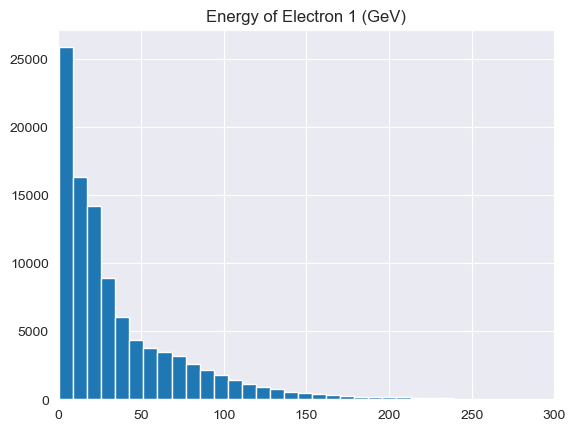

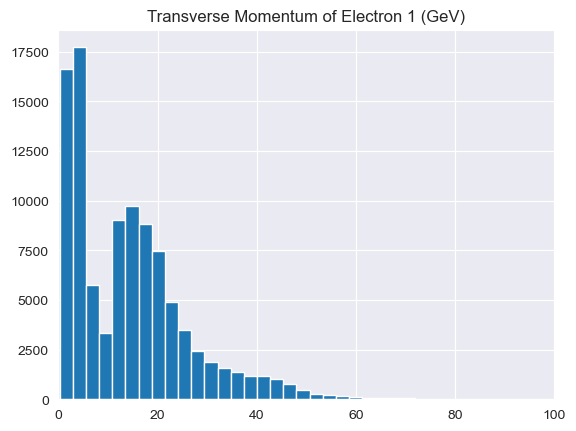

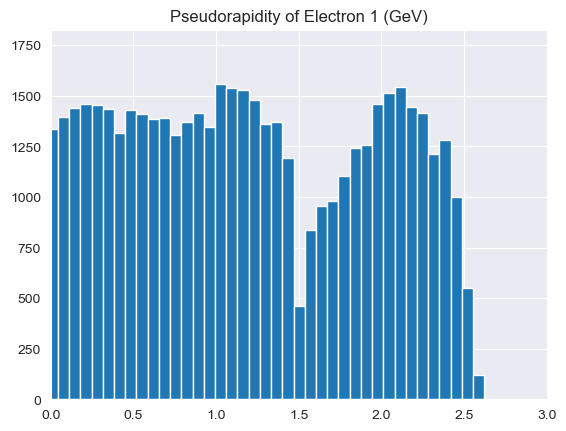

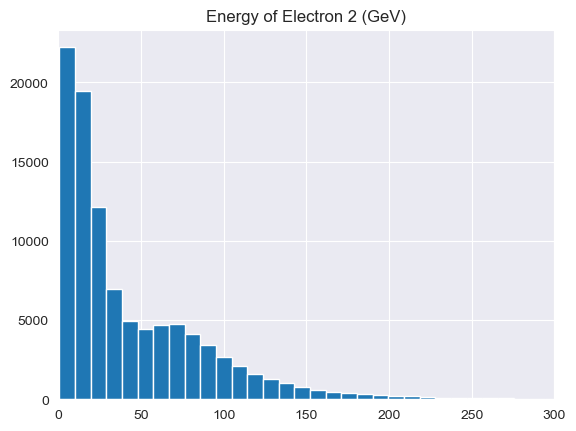

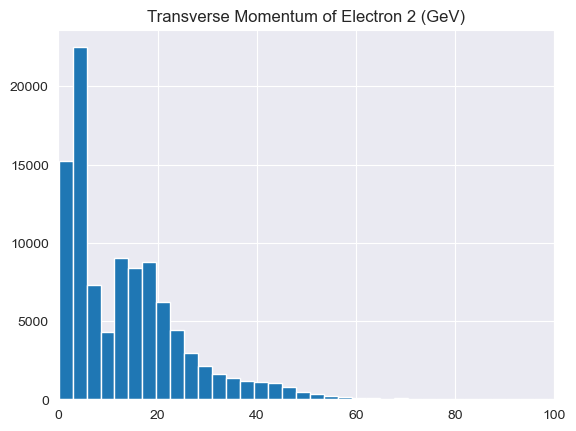

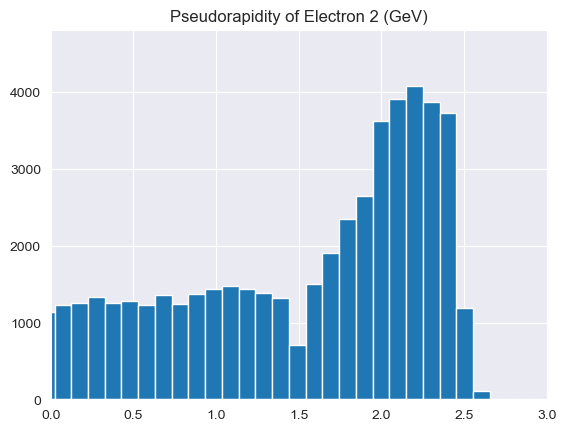

In [33]:
plt.hist(df['E1'], bins = 100)
plt.xlim(0, 300)
plt.title('Energy of Electron 1 (GeV)')
plt.show()


plt.hist(df['pt1'], bins = 100)
plt.xlim(0, 100)
plt.title('Transverse Momentum of Electron 1 (GeV)')
plt.show()

plt.hist(df['eta1'], bins = 100)
plt.xlim(0, 3)
plt.title('Pseudorapidity of Electron 1 (GeV)')
plt.show()

plt.hist(df['E2'], bins = 100)
plt.xlim(0, 300)
plt.title('Energy of Electron 2 (GeV)')
plt.show()

plt.hist(df['pt2'], bins = 100)
plt.xlim(0, 100)
plt.title('Transverse Momentum of Electron 2 (GeV)')
plt.show()

plt.hist(df['eta2'], bins = 100)
plt.xlim(0, 3)
plt.title('Pseudorapidity of Electron 2 (GeV)')
plt.show()

In [34]:
df.drop(["Event"], axis=1, inplace=True)
df.drop(["Run"], axis=1, inplace=True)
df.isna().sum()

E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M       85
dtype: int64

In [35]:
df.dropna(inplace = True)
y = df['M']
X = df.drop('M', axis=1)
names = X.columns

In [36]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=90125)

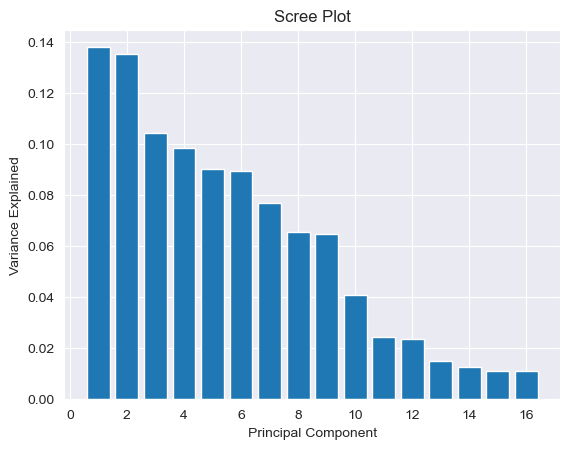

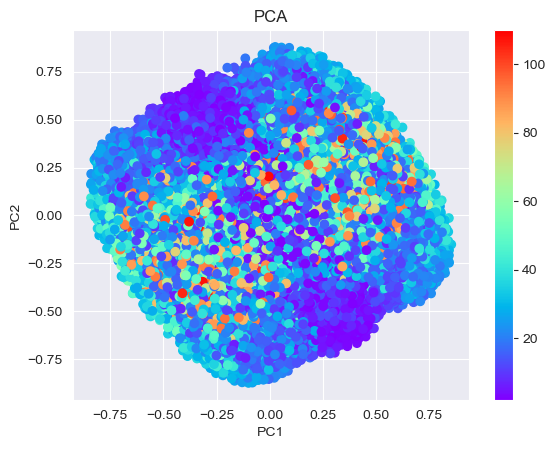

In [37]:
#We visualize the data using PCA:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(train_X)
df_norm = normalize(df_scaled)
df_norm = pd.DataFrame(df_norm)

pca = PCA(n_components = 16)
df_prin = pca.fit_transform(df_norm)
df_prin = pd.DataFrame(df_prin)


plt.bar(np.linspace(1,len(pca.explained_variance_ratio_),len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

plt.scatter(df_prin[0], df_prin[1], c=train_y, cmap='rainbow')
plt.colorbar()
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

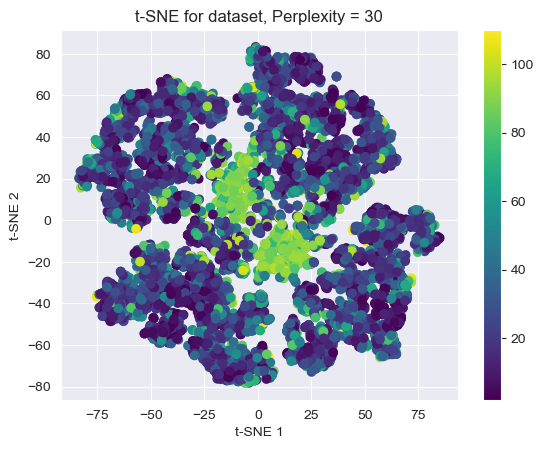

In [38]:
#We now use t-SNE to visualize:

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity = 30)
df_scaled = StandardScaler().fit_transform(train_X)
df_scaled = df_scaled[:10000]
df_tsne = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(df_tsne)
df_tsne.columns = ['T1', 'T2']

plt.scatter(df_tsne['T1'], df_tsne['T2'], c=train_y[:10000], cmap='viridis')
plt.title('t-SNE for dataset, Perplexity = 30')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()

In [39]:
!pip install umap-learn
!pip install umap-learn[plot]
import umap.plot

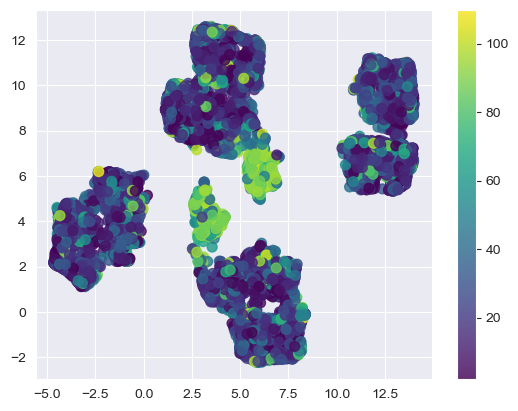

In [40]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(train_X)
df_norm = normalize(df_scaled)
df_norm = pd.DataFrame(df_norm)
reducer = umap.UMAP(random_state=90125, n_neighbors=15, min_dist=0.1, n_components=2)
X_embedded = reducer.fit_transform(df_norm.head(10000))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=np.array(train_y.head(10000)), cmap='viridis', s=50, alpha=0.8)
plt.colorbar()

Optimal n_neighbors: 5


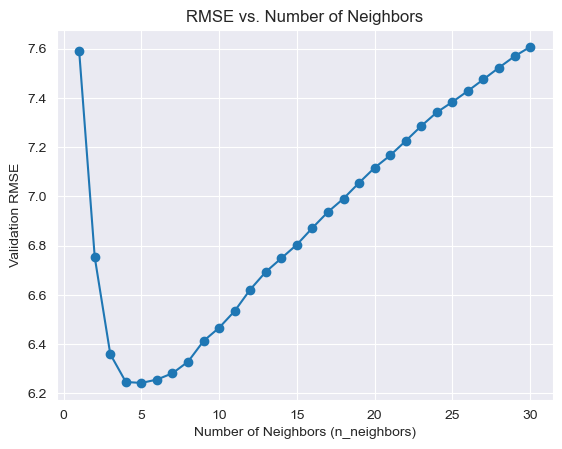

In [47]:
#Checking the optimal number of neighbors for a KNeighborsRegressor model.

rmse_scores = []
neighbor_range = range(1, 31) 

for n in neighbor_range:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    rmse = np.sqrt(mean_squared_error(test_y, pred_y))
    rmse_scores.append(rmse)

optimal_n = neighbor_range[np.argmin(rmse_scores)]
print(f"Optimal n_neighbors: {optimal_n}")

plt.plot(neighbor_range, rmse_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Validation RMSE")
plt.title("RMSE vs. Number of Neighbors")
plt.show()

In [49]:
def evaluate_models(models, tr_X, tr_y, ts_X, ts_y):
    results = {}
    for name, model in models:
        print(f"Evaluating model: {name}")
        model.fit(tr_X, tr_y)
        pred_y = model.predict(ts_X)
        r2 = model.score(ts_X, ts_y)
        rmse = np.sqrt(mean_squared_error(ts_y, pred_y))
        mae = mean_absolute_error(ts_y, pred_y)
        results[name] = {'r2_score': r2, 'rmse': rmse, 'mae': mae}
    return results

models = [
    ("Linear", LinearRegression()),
    ("LGBM", LGBMRegressor(random_state=0)),
    ("Random Forest", RandomForestRegressor(random_state=0)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=0)),
    ("XGBoost", XGBRegressor(random_state=0)),
    ("Decision Tree", DecisionTreeRegressor(random_state=0)),
    ("KNN", KNeighborsRegressor(n_neighbors=5)),
    ("Hist Gradient Boosting", HistGradientBoostingRegressor(random_state=0)),
    ("SVR", SVR()),
    ("Ridge", Ridge(random_state=0)),
    ("Lasso", Lasso(random_state=0))
]
results = evaluate_models(models, train_X, train_y, test_X, test_y)

print("\nSummary of Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: R² = {metrics['r2_score']:.4f}, RMSE = {metrics['rmse']:.4f}, MAE = {metrics['mae']:.4f}")

Evaluating model: Linear
Evaluating model: LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3576
[LightGBM] [Info] Number of data points in the train set: 79932, number of used features: 16
[LightGBM] [Info] Start training from score 30.099905
Evaluating model: Random Forest
Evaluating model: Gradient Boosting
Evaluating model: XGBoost
Evaluating model: Decision Tree
Evaluating model: KNN
Evaluating model: Hist Gradient Boosting
Evaluating model: SVR
Evaluating model: Ridge
Evaluating model: Lasso

Summary of Results:
Linear: R² = 0.4039, RMSE = 19.3291, MAE = 14.1128
LGBM: R² = 0.9582, RMSE = 5.1199, MAE = 3.6236
Random Forest: R² = 0.9466, RMSE = 5.7870, MAE = 3.8591
Gradient Boosting: R² = 0.7880, RMSE = 11.5274, MAE = 7.9922
XGBoost: R² = 0.9795, RMSE = 3.581

In [52]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
model = XGBRegressor()

param_grid = {
    'n_estimators': [1000, 2000, 5000],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

search = GridSearchCV(model, param_grid, scoring=mae_scorer, cv=5, verbose=1, n_jobs=-1)

search.fit(train_X, train_y)
print(f"Best parameters: {search.best_params_}")
print(f"Best MAE score: {-search.best_score_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 5000, 'subsample': 0.8}
Best MAE score: 1.139627525553028


In [53]:
model = XGBRegressor(subsample = 0.8, n_estimators = 5000, min_child_weight = 3, max_depth = 7, learning_rate = 0.05, colsample_bytree = 0.8, random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
print("Model score:", model.score(test_X, test_y))
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

Model score: 0.9948364164582558
RMSE test: 1.799030
MAE: 1.063393579322379


In [54]:
test_y = np.array(test_y).ravel()  # Ensure test_y is 1-dimensional
pred_y = np.array(pred_y).ravel()  # Ensure pred_y is 1-dimensional

test_y_df = pd.DataFrame({'Actual_Value': test_y})
pred_y_df = pd.DataFrame({'Predicted_Value': pred_y})
result_df = pd.concat([test_y_df, pred_y_df], axis=1)
result_df

,Actual_Value,Predicted_Value
0,25.64920,25.287376
1,21.69630,26.804014
2,7.22472,8.661284
3,30.98740,30.268501
4,41.47520,43.085045
...,...,...
19978,15.44750,15.992184
19979,54.42620,57.304058
19980,28.41820,27.928820
19981,21.96070,21.401297


   Feature  Importance
7       Q1    0.000502
15      Q2    0.000535
6     phi1    0.006837
9      px2    0.008856
14    phi2    0.009494
10     py2    0.012818
1     px1     0.014504
2      py1    0.021146
8       E2    0.073332
0       E1    0.078569
13    eta2    0.083775
5     eta1    0.098945
3      pz1    0.121911
11     pz2    0.139348
4      pt1    0.154522
12     pt2    0.174906


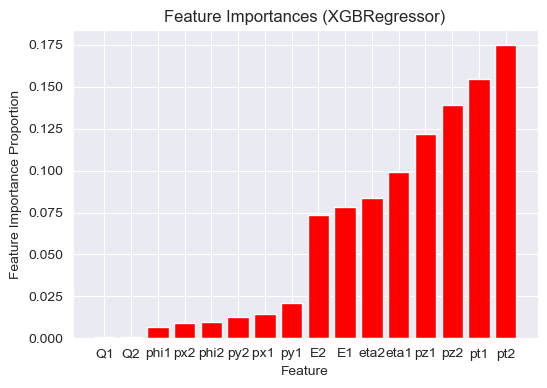

In [55]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=True)
print(importance_df)

plt.figure(figsize=(6, 4))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xlabel('Feature')
plt.ylabel('Feature Importance Proportion')
plt.title('Feature Importances (XGBRegressor)')
plt.show()